In [1]:
%%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #
from sklearn.model_selection import train_test_split
from matplotlib import cm
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

print("Comenzo la carga...")
train_req = pd.read_excel("train_requerimientos.xlsx")
train_cliente = pd.read_excel("train_clientes.xlsx")
test_cliente = pd.read_excel('test_clientes.xlsx')
test_req = pd.read_excel('test_requerimientos.xlsx') 
print ("Termino de cargar...")

Comenzo la carga...
Termino de cargar...
Wall time: 1min 4s


### Enlaces
* https://stackoverflow.com/questions/17995024/how-to-assign-a-name-to-the-a-size-column
* https://datascience.stackexchange.com/questions/20308/how-to-sum-values-grouped-by-two-columns-in-pandas
* https://stackoverflow.com/questions/25748683/pandas-sum-dataframe-rows-for-given-columns

In [2]:
print (train_cliente.columns)
print (train_req.columns)
print ("*******")
print (test_cliente.columns)
print (test_req.columns)

Index(['ID_CORRELATIVO', 'CODMES', 'FLG_BANCARIZADO', 'RANG_INGRESO',
       'FLAG_LIMA_PROVINCIA', 'EDAD', 'ANTIGUEDAD', 'ATTRITION',
       'RANG_SDO_PASIVO_MENOS0', 'SDO_ACTIVO_MENOS0', 'SDO_ACTIVO_MENOS1',
       'SDO_ACTIVO_MENOS2', 'SDO_ACTIVO_MENOS3', 'SDO_ACTIVO_MENOS4',
       'SDO_ACTIVO_MENOS5', 'FLG_SEGURO_MENOS0', 'FLG_SEGURO_MENOS1',
       'FLG_SEGURO_MENOS2', 'FLG_SEGURO_MENOS3', 'FLG_SEGURO_MENOS4',
       'FLG_SEGURO_MENOS5', 'RANG_NRO_PRODUCTOS_MENOS0', 'FLG_NOMINA',
       'NRO_ACCES_CANAL1_MENOS0', 'NRO_ACCES_CANAL1_MENOS1',
       'NRO_ACCES_CANAL1_MENOS2', 'NRO_ACCES_CANAL1_MENOS3',
       'NRO_ACCES_CANAL1_MENOS4', 'NRO_ACCES_CANAL1_MENOS5',
       'NRO_ACCES_CANAL2_MENOS0', 'NRO_ACCES_CANAL2_MENOS1',
       'NRO_ACCES_CANAL2_MENOS2', 'NRO_ACCES_CANAL2_MENOS3',
       'NRO_ACCES_CANAL2_MENOS4', 'NRO_ACCES_CANAL2_MENOS5',
       'NRO_ACCES_CANAL3_MENOS0', 'NRO_ACCES_CANAL3_MENOS1',
       'NRO_ACCES_CANAL3_MENOS2', 'NRO_ACCES_CANAL3_MENOS3',
       'NRO_ACCES_CAN

### Tratando requerimientos

In [3]:
%%time
group_train2 =  train_req.groupby(["ID_CORRELATIVO","TIPO_REQUERIMIENTO2","DICTAMEN"])
group_test2 =  test_req.groupby(["ID_CORRELATIVO","TIPO_REQUERIMIENTO2","DICTAMEN"])

df_train_req=group_train2.size().to_frame('size').reset_index()
df_test_req=group_test2.size().to_frame('size').reset_index()

df_train_req['FUSION']=df_train_req['TIPO_REQUERIMIENTO2']+" "+df_train_req['DICTAMEN']
df_test_req['FUSION']=df_train_req['TIPO_REQUERIMIENTO2']+" "+df_train_req['DICTAMEN']

pivot=df_train_req.pivot_table(values='size',index="ID_CORRELATIVO", columns=["TIPO_REQUERIMIENTO2","FUSION"],aggfunc=np.sum)
pivot_test=df_test_req.pivot_table(values='size',index="ID_CORRELATIVO", columns=["TIPO_REQUERIMIENTO2","FUSION"],aggfunc=np.sum)


Wall time: 147 ms


In [4]:
#df_train_req[df_train_req["ID_CORRELATIVO"]==154]
#pivot.loc[[154],:]

In [5]:
pivot.fillna(value=0, inplace=True)
pivot_test.fillna(value=0, inplace=True)

pivot_total_reclamo= pivot["Reclamo"].sum(axis=1)
pivot_total_reclamo_test= pivot_test["Reclamo"].sum(axis=1)
#pivot_total_reclamo=pivot_total_reclamo.to_frame('SUMA RECLA')
pivot_total_solicitud= pivot["Solicitud"].sum(axis=1)
pivot_total_solicitud_test= pivot_test["Solicitud"].sum(axis=1)
#pivot_total_solicitud=pivot_total_solicitud.to_frame('SUMA SOLI')
#pivot.reset_index(inplace=True)
#pivot_total_reclamo.reset_index(inplace=True)
#pivot_total_reclamo

pivot_no_procede_reclamo=pivot["Reclamo"]["Reclamo NO PROCEDE"]+pivot["Reclamo"]["Reclamo PROCEDE PARCIAL"]
pivot_no_procede_reclamo_test=pivot_test["Reclamo"]["Reclamo NO PROCEDE"]+pivot_test["Reclamo"]["Reclamo PROCEDE PARCIAL"]
#pivot_no_procede_reclamo.to_frame('No Reclamo')
pivot_no_procede_solicitud=pivot["Solicitud"]["Solicitud NO PROCEDE"]+pivot["Solicitud"]["Solicitud PROCEDE PARCIAL"]
pivot_no_procede_solicitud_test=pivot_test["Solicitud"]["Solicitud NO PROCEDE"]+pivot_test["Solicitud"]["Solicitud PROCEDE PARCIAL"]

#pivot_no_procede_reclamo.to_frame('No Solicitud')

requeremiento={}
requeremiento_test={}
requerimiento={"reclamos":pivot_total_reclamo, "no_reclamos":pivot_no_procede_reclamo ,"solicitudes":pivot_total_solicitud,"no_solicitudes":pivot_no_procede_solicitud}
requerimiento_test={"reclamos":pivot_total_reclamo_test, "no_reclamos":pivot_no_procede_reclamo_test ,"solicitudes":pivot_total_solicitud_test,"no_solicitudes":pivot_no_procede_solicitud_test}


df_requerimiento=pd.DataFrame(requerimiento)
df_requerimiento_test=pd.DataFrame(requerimiento_test)

df_requerimiento["%no_reclamos"] = np.where(df_requerimiento["reclamos"]==0, 0, df_requerimiento["no_reclamos"]/df_requerimiento["reclamos"])
df_requerimiento_test["%no_reclamos"] = np.where(df_requerimiento_test["reclamos"]==0, 0, df_requerimiento_test["no_reclamos"]/df_requerimiento_test["reclamos"])

#procesado=pd.DataFrame(pivot_total_reclamo,pivot_total_solicitud)
df_requerimiento["%no_solicitudes"] = np.where(df_requerimiento["solicitudes"]==0, 0, df_requerimiento["no_solicitudes"]/df_requerimiento["solicitudes"])
df_requerimiento_test["%no_solicitudes"] = np.where(df_requerimiento_test["solicitudes"]==0, 0, df_requerimiento_test["no_solicitudes"]/df_requerimiento_test["solicitudes"])


In [6]:
df_requerimiento.reset_index(inplace=True)
df_requerimiento_test.reset_index(inplace=True)

train=pd.merge(train_cliente,df_requerimiento, on="ID_CORRELATIVO", how='outer')
test=pd.merge(test_cliente,df_requerimiento_test, on="ID_CORRELATIVO", how='outer')

In [7]:
print (train.columns)
print (test.columns)

Index(['ID_CORRELATIVO', 'CODMES', 'FLG_BANCARIZADO', 'RANG_INGRESO',
       'FLAG_LIMA_PROVINCIA', 'EDAD', 'ANTIGUEDAD', 'ATTRITION',
       'RANG_SDO_PASIVO_MENOS0', 'SDO_ACTIVO_MENOS0', 'SDO_ACTIVO_MENOS1',
       'SDO_ACTIVO_MENOS2', 'SDO_ACTIVO_MENOS3', 'SDO_ACTIVO_MENOS4',
       'SDO_ACTIVO_MENOS5', 'FLG_SEGURO_MENOS0', 'FLG_SEGURO_MENOS1',
       'FLG_SEGURO_MENOS2', 'FLG_SEGURO_MENOS3', 'FLG_SEGURO_MENOS4',
       'FLG_SEGURO_MENOS5', 'RANG_NRO_PRODUCTOS_MENOS0', 'FLG_NOMINA',
       'NRO_ACCES_CANAL1_MENOS0', 'NRO_ACCES_CANAL1_MENOS1',
       'NRO_ACCES_CANAL1_MENOS2', 'NRO_ACCES_CANAL1_MENOS3',
       'NRO_ACCES_CANAL1_MENOS4', 'NRO_ACCES_CANAL1_MENOS5',
       'NRO_ACCES_CANAL2_MENOS0', 'NRO_ACCES_CANAL2_MENOS1',
       'NRO_ACCES_CANAL2_MENOS2', 'NRO_ACCES_CANAL2_MENOS3',
       'NRO_ACCES_CANAL2_MENOS4', 'NRO_ACCES_CANAL2_MENOS5',
       'NRO_ACCES_CANAL3_MENOS0', 'NRO_ACCES_CANAL3_MENOS1',
       'NRO_ACCES_CANAL3_MENOS2', 'NRO_ACCES_CANAL3_MENOS3',
       'NRO_ACCES_CAN

In [8]:
values = {'no_reclamos': 0, 'no_solicitudes': 0, 'reclamos': 0,'solicitudes': 0 ,'%no_reclamos': 0,'%no_solicitudes': 0}
train.fillna(value=values, inplace=True)
test.fillna(value=values, inplace=True)
test

ID_CORRELATIVO  CODMES  FLG_BANCARIZADO     RANG_INGRESO  \
0               47411  201208                0  Rang_ingreso_03   
1               39861  201208                1  Rang_ingreso_03   
2               38898  201208                1  Rang_ingreso_04   
3               50927  201208                1  Rang_ingreso_02   
4               32969  201208                1  Rang_ingreso_03   
5               89661  201208                1  Rang_ingreso_03   
6               12197  201208                1  Rang_ingreso_02   
7               71520  201208                1  Rang_ingreso_02   
8               59759  201208                1              NaN   
9               36743  201208                1  Rang_ingreso_04   
10              10736  201208                1  Rang_ingreso_04   
11               5106  201208                1  Rang_ingreso_01   
12              44506  201208                1  Rang_ingreso_03   
13              47767  201208                0  Rang_ingreso_02   
14              74686  201208                1  Rang_ingreso_03   
15              63023  201208                0  Rang_ingreso_03   
16              13584  201208                0  Rang_ingreso_01   
17                317  201208                0              NaN   
18              62570  201208                1  Rang_ingreso_01   
19              68244  201208                1  Rang_ingreso_06   
20              72881  201208                1  Rang_ingreso_01   
21              18280  201208                0  Rang_ingreso_09   
22              70682  201208                1  Rang_ingreso_02   
23              79902  201208                0              NaN   
24              35073  201208                1  Rang_ingreso_04   
25              84331  201208                1  Rang_ingreso_04   
26              70921  201208                1  Rang_ingreso_06   
27              82245  201208                1  Rang_ingreso_02   
28              17714  201208                1  Rang_ingreso_01   
29              13993  201208                1  Rang_ingreso_06   
30                658  201208                1  Rang_ingreso_04   
31              33916  201208                1  Rang_ingreso_02   
32              92737  201208                1  Rang_ingreso_01   
33              22844  201208                1  Rang_ingreso_05   
34              93339  201208                1  Rang_ingreso_02   
35              29572  201208                1  Rang_ingreso_07   
36              24751  201208                1  Rang_ingreso_01   
37              37862  201208                1  Rang_ingreso_07   
38              26676  201208                0              NaN   
39               8675  201208                1  Rang_ingreso_03   
40              64245  201208                0  Rang_ingreso_03   
41              57248  201208                0              NaN   
42               3531  201208                1  Rang_ingreso_08   
43               9834  201208                0  Rang_ingreso_01   
44              74246  201208                1              NaN   
45              56683  201208                0  Rang_ingreso_01   
46              16847  201208                1  Rang_ingreso_02   
47              96617  201208                1  Rang_ingreso_02   
48              94167  201208                0              NaN   
49              42800  201208                1  Rang_ingreso_03   
50              70106  201208                1  Rang_ingreso_03   
51              42486  201208                1  Rang_ingreso_03   
52              78076  201208                1  Rang_ingreso_01   
53              85819  201208                0  Rang_ingreso_01   
54              15786  201208                1  Rang_ingreso_04   
55              61483  201208                1  Rang_ingreso_07   
56              25630  201208                1  Rang_ingreso_03   
57              22501  201208                1  Rang_ingreso_02   
58              92447  201208                1  Rang_i

In [9]:
print("Train")
train.sort_values(by="ID_CORRELATIVO", inplace=True)
print ("El número de filas " + str(train.shape))
print (train.groupby(["ATTRITION"]).size())


Train
El número de filas (70000, 59)
ATTRITION
0    59178
1    10822
dtype: int64


In [10]:
#[train["ATTRITION"]==1]
#'ANTIGUEDAD','EDAD','SDO_ACTIVO_MENOS0','FLG_SEGURO_MENOS0','FLG_NOMINA','NRO_ENTID_SSFF_MENOS0','FLG_SDO_OTSSFF_MENOS0'
X_train=train[['FLG_BANCARIZADO','ANTIGUEDAD','EDAD','SDO_ACTIVO_MENOS0','FLG_SEGURO_MENOS0','FLG_NOMINA','NRO_ENTID_SSFF_MENOS0','%no_reclamos',"%no_solicitudes"]]
X_train=X_train.fillna(X_train.mean()[['ANTIGUEDAD','EDAD']])
Y_train =train['ATTRITION']
print (X_train.shape)
print (Y_train.shape)
#X_train_np=X_train.as_matrix(columns=None)
#Y_train_np=Y_train.as_matrix(columns=None)

(70000, 9)
(70000,)


In [11]:
##Feature pair plot, cmap=cmap
%matplotlib inline 
#cmap = cm.get_cmap('gnuplot')
#colors=['green','red']
#scatter = pd.plotting.scatter_matrix(X_train,c=Y_train.apply(lambda x:colors[x]),marker='o',s=40, figsize=(100, 100),hist_kwds={'bins':15},cmap='brg')


* Bancarizado es un atributo importante, parece que todos son verdes
* mientras mayor el saldo activo menos se retiran
* Bancarizado y más de 10 años no se va

In [12]:
#X_train2 = X_train.copy()
#X_train2=X_train.fillna(X_train.mean()[['ANTIGUEDAD','EDAD']])
X_train_p, X_test_p, Y_train_p,Y_test_p = train_test_split(X_train,Y_train,random_state=0)
print (X_train_p)

       FLG_BANCARIZADO  ANTIGUEDAD       EDAD  SDO_ACTIVO_MENOS0  \
46833                0    0.000000  23.000000                  0   
64923                1    0.000000  27.000000                  0   
64907                1    0.000000  45.000000                  0   
65319                1    0.000000  42.000000              11260   
12095                1    6.000000  48.000000                  0   
38947                1    0.000000  37.000000                  0   
7519                 1    0.000000  53.000000                  0   
25702                1    2.000000  26.000000               2810   
3258                 1    0.000000  55.000000               1010   
22504                1    2.000000  38.000000                  0   
22109                0    0.000000  35.232474                  0   
25893                1    2.549283  24.000000                  0   
8876                 1    0.000000  56.000000                  0   
62779                1    0.000000  35.000000   

Comenzo bucle knn
termino bucle knn
    nume     score   weights
34    18  0.846000   uniform
36    19  0.845829   uniform
30    16  0.845714   uniform
32    17  0.844914   uniform
28    15  0.844629   uniform
26    14  0.844000   uniform
14     8  0.840629   uniform
10     6  0.840343   uniform
37    19  0.838629  distance
35    18  0.838514  distance
6      4  0.838457   uniform
31    16  0.838229  distance
33    17  0.838057  distance
29    15  0.837657  distance
27    14  0.837657  distance
2      2  0.835086   uniform
22    12  0.835029   uniform
15     8  0.834514  distance
18    10  0.834000   uniform
24    13  0.833543   uniform
11     6  0.833486  distance
20    11  0.832400   uniform
16     9  0.829429   uniform
7      4  0.829200  distance
23    12  0.828343  distance
19    10  0.828114  distance
25    13  0.827314  distance
21    11  0.826571  distance
12     7  0.825657   uniform
8      5  0.825600   uniform
17     9  0.824343  distance
9      5  0.821429  distance
13     

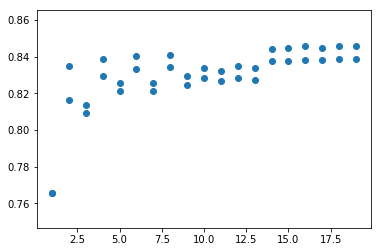

Wall time: 2min 1s


In [14]:
%%time
print ("Comenzo bucle knn")
from sklearn.neighbors import KNeighborsClassifier

aux_dict = {}
aux_list =[]
for nume in range(1,20):
    for weights in ['uniform', 'distance']:
        knn = KNeighborsClassifier(n_neighbors=nume,weights=weights)
        knn.fit(X_train_p,Y_train_p)
        aux_dict={'nume': nume, 'weights': weights, 'score':knn.score(X_test_p,Y_test_p)}
        aux_list.append(aux_dict)
        #print (str(nume)+' '+str(weights)+' '+str(knn.score(X_test,y_test))) 

print ("termino bucle knn")
aux_DataFrame=pd.DataFrame(aux_list).sort_values(by='score', ascending = False)
print (aux_DataFrame)

plt.figure()
plt.scatter(aux_DataFrame.nume, aux_DataFrame.score)
plt.show()

In [30]:
prediction = knn.predict(X_test_p)
X_test_c = X_test_p.copy()
X_test_c['real'] = Y_test_p
X_test_c['predic'] = prediction
#print (X_test_c[['real','predic']])
print (X_test_c[X_test_c['predic']==0][['predic']].size)
print (X_test_c[X_test_c['predic']==1][['predic']].size)

17007
493
